In [1]:
import os
import numpy as np
import glob
from pyhdf.SD import SD, SDC
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
USE_NETCDF4 = False
Data_field = 'Deep_Blue_Aerosol_Optical_Depth_550_Land'

In [3]:
dirlist = glob.glob('AOD_Nepal_china/*hdf')

In [4]:
n = 0
for i in dirlist:
    print(i)
    f = SD(i,SDC.READ)
    lat = f.select('Latitude')
    lon = f.select("Longitude")
    data2D = f.select(Data_field)
    latitude = lat[:,:]
    lognitude = lon[:,:]
    data = data2D[:,:].astype(np.double)
    data [data<-9000.0] = 0.0
#     latitude[latitude<-900]  = 90 #np.nanmean(latitude[latitude<-900])
#     lognitude[lognitude <-900]  = 21 #np.nanmean(lognitude[lognitude<-90])
    if n ==0:
        lognitude1 = lognitude
        lattitude1 = latitude
        data1 = data 
    else:
        lognitude1 = np.vstack((lognitude1,lognitude))
        lattitude1 = np.vstack((lattitude1,latitude))
        data1 = np.vstack((data1,data))
        
    n+=1

AOD_Nepal_china\MOD04_L2.A2022163.0125.061.2022163134820.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0130.061.2022163134822.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0135.061.2022163134741.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0305.061.2022163134847.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0310.061.2022163134827.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0315.061.2022163134714.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0320.061.2022163134755.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0445.061.2022163134904.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0450.061.2022163134827.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0455.061.2022163134758.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0500.061.2022163134646.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0625.061.2022163195540.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0630.061.2022163195819.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0635.061.2022163195541.hdf
AOD_Nepal_china\MOD04_L2.A2022163.0800.061.2022163195617.hdf
AOD_Nepal_china\MOD04_L2.A2022163.1240.061.2022164015906.hdf
AOD_Nepal_china\MOD04_L2

In [5]:
lon0 = np.nanmin(lognitude1[lognitude1!=-999.0])
lon1 = np.nanmax(lognitude1[lognitude1!=-999.0])
lat0 = np.nanmin(lattitude1[lattitude1!=-999.0])
lat1 = np.nanmax(lattitude1[lattitude1!=-999.0])

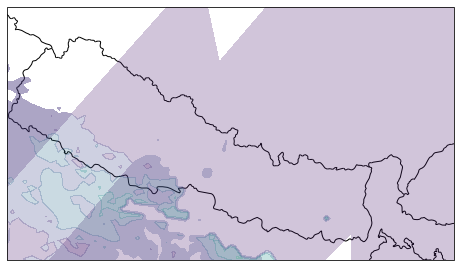

In [6]:
figure = plt.figure(figsize=(8,6))
ax = figure.add_subplot(1,1,1, projection=crs.Mercator())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.STATES)
# Zoom in on the US by setting longitude/latitude parameters
# ax.set_extent(
#     [80, # minimum latitude
#         89, # min longitude
#         26.3, # max latitude
#         31.5 # max longitude
#     ],
#     crs=crs.PlateCarree()
# )
# cs = ax.contourf(lattitude1,lognitude1,data1)
ax.set_extent([80,90,26,31])
cs = ax.contourf(lognitude1,lattitude1,data1,alpha=0.25,transform=crs.PlateCarree())
plt.show()

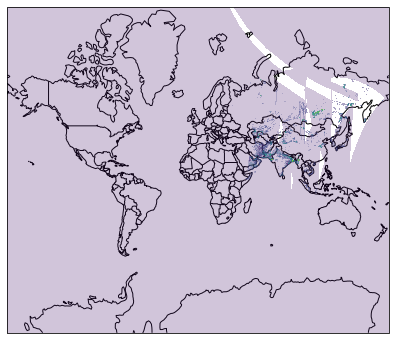

In [20]:
figure = plt.figure(figsize=(8,6))
ax = figure.add_subplot(1,1,1, projection=crs.Mercator())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
#ax.contourf(lognitude1,lattitude1,data1)
# ax.set_ylim([60,90])
# ax.set_xlim([20,31])
#ax.set_extent([60,90,20,31])
cs = ax.contourf(lognitude1,lattitude1,data1,alpha=0.25,transform=crs.PlateCarree()) ## transform is very important  
plt.show()

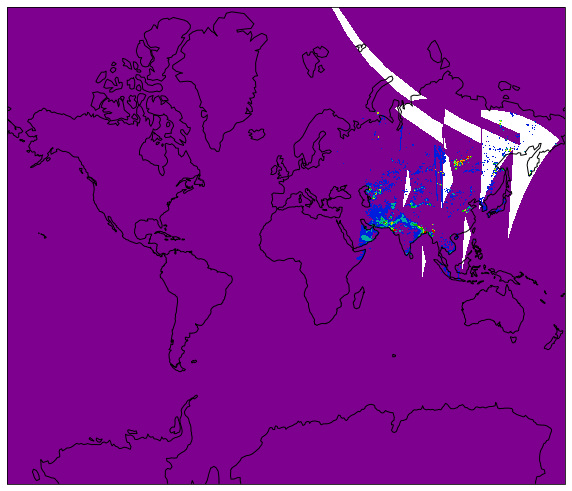

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=crs.Mercator())
ax.contourf(lognitude1,lattitude1,data1,
            transform=crs.PlateCarree(),
            cmap='nipy_spectral')
ax.set_extent([80,90,26,31])
ax.coastlines()
ax.set_global()
plt.show()
data

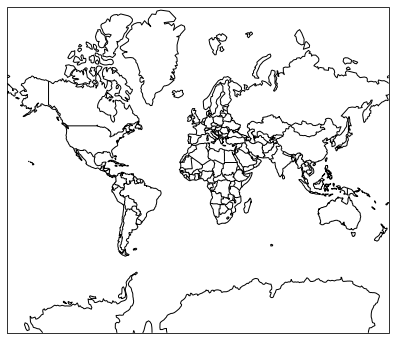

In [8]:
figure = plt.figure(figsize=(8,6))
ax = figure.add_subplot(1,1,1, projection=crs.Mercator())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.STATES)
# Zoom in on the US by setting longitude/latitude parameters
# ax.set_extent(
#     [-10, # minimum latitude
#         93, # min longitude
#         45, # max latitude
#         63 # max longitude
#     ],
#     crs=crs.PlateCarree()
# )
#ax.set_extent([40,6,42,91])
#cs = ax.contourf(lognitude1,lattitude1,data1)
plt.show()

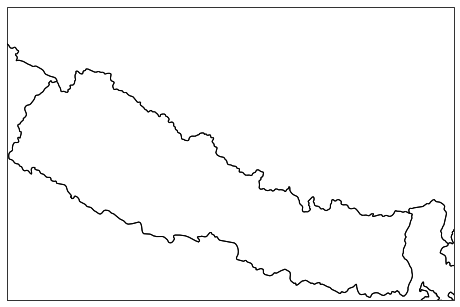

In [9]:
lognitude1[lognitude1<-900.0] = 2
lattitude1[lattitude1<-900.0] = 90
figure = plt.figure(figsize=(8,6))
ax = figure.add_subplot(1,1,1, projection=crs.Mercator())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.STATES)
#Zoom in on the US by setting longitude/latitude parameters
# ax.set_extent(
#     [lat0, # minimum latitude
#         lon0, # min longitude
#         lat1, # max latitude
#         lon1 # max longitude
#     ],
#     crs=crs.PlateCarree()
# )


# # draw filled contours.
clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
# # In future MetPy
# # norm, cmap = ctables.registry.get_with_boundaries('precipitation', clevs)
# cmap_data = [(1.0, 1.0, 1.0),
#              (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
#              (0.0, 1.0, 1.0),
#              (0.0, 0.8784313797950745, 0.501960813999176),
#              (0.0, 0.7529411911964417, 0.0),
#              (0.501960813999176, 0.8784313797950745, 0.0),
#              (1.0, 1.0, 0.0),
#              (1.0, 0.6274510025978088, 0.0),
#              (1.0, 0.0, 0.0),
#              (1.0, 0.125490203499794, 0.501960813999176),
#              (0.9411764740943909, 0.250980406999588, 1.0),
#              (0.501960813999176, 0.125490203499794, 1.0),
#              (0.250980406999588, 0.250980406999588, 1.0),
#              (0.125490203499794, 0.125490203499794, 0.501960813999176),
#              (0.125490203499794, 0.125490203499794, 0.125490203499794),
#              (0.501960813999176, 0.501960813999176, 0.501960813999176),
#              (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
#              (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
#              (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
#              (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
#              (0.4000000059604645, 0.20000000298023224, 0.0)]
# cmap = mcolors.ListedColormap(data1, 'precipitation')
# norm = mcolors.BoundaryNorm(clevs, cmap.N)

#cs = ax.contourf(x, y, data, clevs, cmap=cmap, norm=norm)

cs = ax.contourf(lognitude1,lattitude1,data1,clevs)
ax.add_feature(cfeature.BORDERS)
ax.set_extent(
    [80, # minimum latitude
        89, # min longitude
        26.3, # max latitude
        31.5 # max longitude
    ],
    crs=crs.PlateCarree()
)
plt.show()

In [10]:
cfeature.BORDERS

In [12]:
np.shape(lognitude1)

(3654, 135)

In [13]:
np.shape(lattitude1)

(3654, 135)

In [14]:
np.shape(data1)

(3654, 135)

In [15]:
np.ma.masked_equal(lattitude1, -999.0)

masked_array(
  data=[[70.97869 , 71.012276, 71.03559 , ..., 64.10521 , 63.85838 ,
         63.591377],
        [70.891464, 70.92471 , 70.94777 , ..., 64.03877 , 63.792686,
         63.526257],
        [70.80371 , 70.83678 , 70.85965 , ..., 63.974014, 63.728455,
         63.46298 ],
        ...,
        [72.918526, 72.95971 , 72.98938 , ..., 65.570755, 65.308945,
         65.025505],
        [73.00629 , 73.04771 , 73.07762 , ..., 65.63192 , 65.36974 ,
         65.08526 ],
        [73.09321 , 73.13499 , 73.16516 , ..., 65.693954, 65.431114,
         65.14609 ]],
  mask=False,
  fill_value=-999.0,
  dtype=float32)

In [16]:
#data1[np.ma.masked_less_equal(lattitude1,-900)]

In [17]:
np.ma.masked_less_equal(lattitude1,-900)

masked_array(
  data=[[70.97869 , 71.012276, 71.03559 , ..., 64.10521 , 63.85838 ,
         63.591377],
        [70.891464, 70.92471 , 70.94777 , ..., 64.03877 , 63.792686,
         63.526257],
        [70.80371 , 70.83678 , 70.85965 , ..., 63.974014, 63.728455,
         63.46298 ],
        ...,
        [72.918526, 72.95971 , 72.98938 , ..., 65.570755, 65.308945,
         65.025505],
        [73.00629 , 73.04771 , 73.07762 , ..., 65.63192 , 65.36974 ,
         65.08526 ],
        [73.09321 , 73.13499 , 73.16516 , ..., 65.693954, 65.431114,
         65.14609 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)